In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)   
y = numpy.linspace(y_start, y_end, N)   
X, Y = numpy.meshgrid(x, y)             

In [3]:
class Source:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
    def velocity(self,X,Y):
        self.u = (self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
    def stream_function(self,X,Y):
        self.psi = (self.strength / (2 * math.pi) *
                    numpy.arctan2((Y - self.y), (X - self.x)))  

In [4]:
s1_source = 5.0
x_source,y_source=0.0,0.5
source = Source(s1_source, x_source, y_source)
source.velocity(X, Y)
source.stream_function(X, Y)

In [5]:
source_image = Source(s1_source, x_source, -y_source)
source_image.velocity(X, Y)
source_image.stream_function(X, Y)

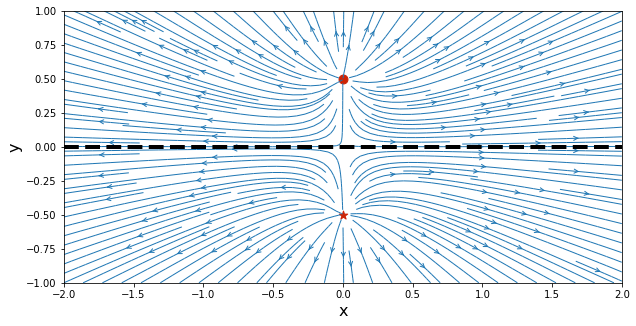

In [9]:
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='*')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [10]:
class Vortex:
    def __init__(self, strength, x, y):
        
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        self.u = (+self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (-self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        
    def stream_function(self, X, Y):
        
        self.psi = (-self.strength / (4 * math.pi) *
                    numpy.log((X - self.x)**2 + (Y - self.y)**2))

In [11]:
strength_vortex = 5.0                 
x_vortex, y_vortex = 0.0, 0.5         

vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

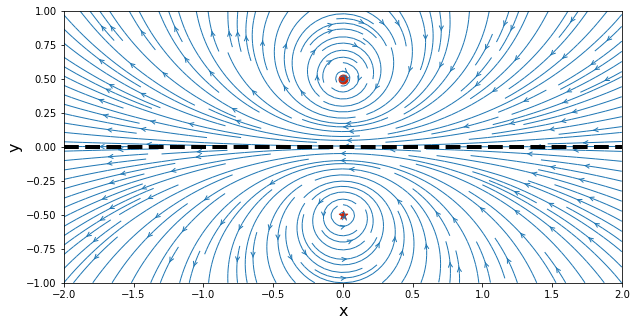

In [12]:
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='*')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [13]:
strength_vortex = 1.0                 
x_vortex1, y_vortex1 = -0.1, 0.5            
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, -x_vortex1, y_vortex1)
vortex1.velocity(X, Y)
vortex1.stream_function(X, Y)
vortex2.velocity(X, Y)
vortex2.stream_function(X, Y)
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, -x_vortex1, -y_vortex1)
vortex1_image.velocity(X, Y)
vortex1_image.stream_function(X, Y)
vortex2_image.velocity(X, Y)
vortex2_image.stream_function(X, Y)

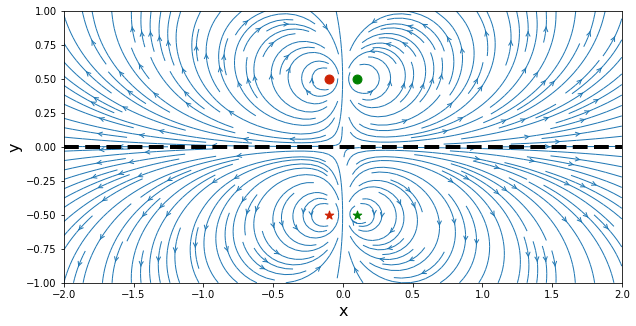

In [15]:
u = vortex1.u + vortex2.u + vortex1_image.u + vortex2_image.u
v = vortex1.v + vortex2.v + vortex1_image.v + vortex2_image.v
psi = vortex1.psi + vortex2.psi + vortex1_image.psi + vortex2_image.psi
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='*')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='*')
pyplot.axhline(0.0, color='k', linestyle='--', linewidth=4);

In [16]:
u_inf = 1.0    
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [17]:
class Doublet:
    def __init__(self, strength, x, y):
       
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        self.u = (-self.strength / (2 * math.pi) *
                  ((X - self.x)**2 - (Y - self.y)**2) /
                  ((X - self.x)**2 + (Y - self.y)**2)**2)
        self.v = (-self.strength / (2 * math.pi) *
                  2 * (X - self.x) * (Y - self.y) /
                  ((X - self.x)**2 + (Y - self.y)**2)**2)
            
    def stream_function(self, X, Y):
        
        self.psi = (-self.strength / (2 * math.pi) *
                    (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))

In [18]:
strength_doublet = 5.0                
x_doublet, y_doublet = 0.0, 0.5      
doublet = Doublet(strength_doublet, x_doublet, y_doublet)
doublet.velocity(X, Y)
doublet.stream_function(X, Y)
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)
doublet_image.velocity(X, Y)
doublet_image.stream_function(X, Y)

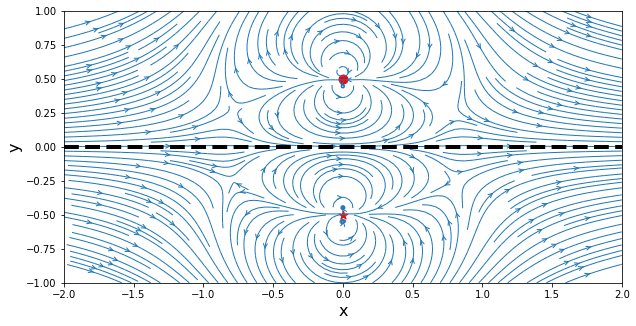

In [19]:
u = u_freestream + doublet.u + doublet_image.u
v = v_freestream + doublet.v + doublet_image.v
psi = psi_freestream + doublet.psi + doublet_image.psi
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='*')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);